In [12]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime
import pickle
import matplotlib.pyplot as plt

In [6]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
path = 'F:/semester 7/vision/data/'
images = []
classNames = []
for entry in os.scandir(path):
        # Check if the entry is a directory
        if entry.is_dir():
            # Process the folder (subdirectory)
            folder_path = entry.path
            folder_name = os.path.basename(folder_path)
            for filename in os.listdir(folder_path):
                # Check if the file is a video file (you can add more video file extensions if needed)
                if filename.endswith(".jpg"):
                    curImg = cv2.imread(os.path.join(folder_path, filename))
                    images.append(curImg)
                    classNames.append(folder_name)


In [16]:
path = 'F:/semester 7/vision/data/new/'
imagess = []
classNamesss = []
for entry in os.scandir(path):
        # Check if the entry is a directory
        if entry.is_dir():
            # Process the folder (subdirectory)
            folder_path = entry.path
            folder_name = os.path.basename(folder_path)
            for filename in os.listdir(folder_path):
                # Check if the file is a video file (you can add more video file extensions if needed)
                if filename.endswith(".jpg"):
                    curImg = cv2.imread(os.path.join(folder_path, filename))
                    imagess.append(curImg)
                    classNamesss.append(folder_name)


In [31]:
def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
        print(img)
    return encodeList

[[[208 207 203]
  [208 207 203]
  [208 207 203]
  ...
  [219 218 216]
  [219 218 216]
  [219 218 216]]

 [[208 207 203]
  [208 207 203]
  [208 207 203]
  ...
  [219 218 216]
  [219 218 216]
  [219 218 216]]

 [[208 207 203]
  [208 207 203]
  [208 207 203]
  ...
  [219 218 216]
  [219 218 216]
  [219 218 216]]

 ...

 [[199 198 194]
  [204 203 199]
  [214 214 214]
  ...
  [192 191 187]
  [192 191 187]
  [193 192 188]]

 [[197 196 192]
  [213 212 208]
  [205 205 205]
  ...
  [192 191 187]
  [192 191 187]
  [193 192 188]]

 [[197 196 192]
  [213 212 208]
  [205 205 205]
  ...
  [192 191 187]
  [192 191 187]
  [193 192 188]]]
[[[208 205 200]
  [208 205 200]
  [208 205 200]
  ...
  [219 218 214]
  [219 218 214]
  [219 218 214]]

 [[207 204 199]
  [207 204 199]
  [207 204 199]
  ...
  [219 218 214]
  [219 218 214]
  [219 218 214]]

 [[207 204 199]
  [207 204 199]
  [207 204 199]
  ...
  [219 218 214]
  [219 218 214]
  [219 218 214]]

 ...

 [[196 192 189]
  [196 192 189]
  [196 192 189]
  ..

In [17]:
for i in range(len(classNamesss)):
    classNames.append(classNamesss[i])
print(classNames)

['Abdelrahman Khalifa_120200024', 'Abdelrahman Khalifa_120200024', 'Abdelrahman Khalifa_120200024', 'Abdelrahman Khalifa_120200024', 'Abdelrahman Khalifa_120200024', 'Abdelrahman Khalifa_120200024', 'Abdelrahman Khalifa_120200024', 'Abdelrahman Khalifa_120200024', 'Abdelrahman Khalifa_120200024', 'Abdelrahman Khalifa_120200024', 'Abdelrahman Khalifa_120200024', 'Abdelrahman Khalifa_120200024', 'Abdelrahman Khalifa_120200024', 'Abdelrahman Khalifa_120200024', 'Abdelrahman Khalifa_120200024', 'Abdelrahman Mohamed_120200213', 'Abdelrahman Mohamed_120200213', 'Abdelrahman Mohamed_120200213', 'Abdelrahman Mohamed_120200213', 'Abdelrahman Mohamed_120200213', 'Abdelrahman Mohamed_120200213', 'Abdelrahman Mohamed_120200213', 'Abdelrahman Mohamed_120200213', 'Abdelrahman Mohamed_120200213', 'Abdelrahman Mohamed_120200213', 'Abdelrahman Mohamed_120200213', 'Abdelrahman Mohamed_120200213', 'Abdelrahman Mohamed_120200213', 'Abdelrahman Mohamed_120200213', 'Abdelrahman Mohamed_120200213', 'Abdelrah

In [18]:
with open('F:/semester 7/vision/Attendance/pages/cv_codes/ClassNames.pkl', 'wb') as file:
    pickle.dump(classNames, file)

In [5]:
def markAttendance(name):
    with open('Attendance.csv', 'r+') as f:
        myDataList = f.readlines()


        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
            if name not in nameList:
                now = datetime.now()
                dtString = now.strftime('%H:%M:%S')
                f.writelines(f'\n{name},{dtString}')

In [39]:

with open('F:/semester 7/vision/Attendance/data/face_encodings.pkl', 'wb') as file:
    pickle.dump(encodeListKnown, file)

In [19]:
with open('F:/semester 7/vision/Attendance/pages/cv_codes/ClassNames.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
print(len(loaded_data))

771


In [6]:
encodeListKnown = findEncodings(images)
with open('F:/semester 7/vision/Attendance/data/face_encodings.pkl', 'wb') as file:
    pickle.dump(encodeListKnown, file)
print('Encoding Complete')

Encoding Complete


In [1]:
##### for video only don't import it 

cap = cv2.VideoCapture(0)

while True:
    success, img = cap.read()
# img = captureScreen()
    imgS = cv2.resize(img, (0, 0), None, 0.25, 0.25)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)

    facesCurFrame = face_recognition.face_locations(imgS)
    encodesCurFrame = face_recognition.face_encodings(imgS, facesCurFrame)

    for encodeFace, faceLoc in zip(encodesCurFrame, facesCurFrame):
        matches = face_recognition.compare_faces(encodeListKnown, encodeFace)
        faceDis = face_recognition.face_distance(encodeListKnown, encodeFace)
# print(faceDis)
        matchIndex = np.argmin(faceDis)

        if matches[matchIndex]:
            name = classNames[matchIndex].upper()
# print(name)
            y1, x2, y2, x1 = faceLoc
            y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.rectangle(img, (x1, y2 - 35), (x2, y2), (0, 255, 0), cv2.FILLED)
            cv2.putText(img, name, (x1 + 6, y2 - 6), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
            markAttendance(name)

    cv2.imshow('Webcam', img)
    cv2.waitKey(1)

NameError: name 'cv2' is not defined

In [11]:
with open('F:/semester 7/vision/data/face_encodings.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
encodeListKnown = loaded_data

img = face_recognition.load_image_file('F:/semester 7/vision/test.jpg')

#imgs = cv2.resize(img, (0, 0), None, 0.25, 0.25)
#imgs = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)
facesCurFrame = face_recognition.face_locations(img)
encodesCurFrame = face_recognition.face_encodings(img)
result = []
for i in range(len(encodesCurFrame)):
    faceDis = face_recognition.face_distance(encodeListKnown, encodesCurFrame[i])

    matchIndex = np.argmin(faceDis)
    if faceDis[matchIndex] < 0.7:
        name = classNames[matchIndex]
        result.append(name)
        #top, right, bottom, left = facesCurFrame[i]
        #cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 2)

        y1, x2, y2, x1 = facesCurFrame[i]
        #y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.rectangle(img, (x1, y2 - 35), (x2, y2), (0, 255, 0), cv2.FILLED)
        cv2.putText(img, name, (x1 + 6, y2 - 6), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
        # #markAttendance(name)

#Display the image with faces
cv2.namedWindow('Detected Faces', cv2.WINDOW_NORMAL)
cv2.imshow('Detected Faces', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
# #cv2.imshow('before Faces', cv2.cvtColor(imgSS, cv2.COLOR_RGB2BGR))

r =  set(result)
#print(classNames)
#print(result)
print(r)
print(len(r))

cv2.resizeWindow('Detected Faces', 300, 200)  # Adjust the size as needed
cv2.waitKey(0)
cv2.destroyAllWindows()

{'Ahmed Hagag_120200101', 'Mariam Ayman_120200094', 'Ahmed Mohamed_120200027', 'Asem Mohamed_120200089', 'Ahmed Abdelkader_120200028', 'Nour Alhuda_120200144', 'Youssef Zaghloul_120190057', 'Mostafa Ahmed_120200043', 'Youssef Ashraf_120200090', 'Alaa Moheb_120200212', 'Sohaila Mohamed_120200062', 'Bassant Tarek_120200244', 'Rowida Elsayed_120200181', 'Omnia Nabil_120200156', 'Noha Omar_120200211', 'Ahmed Fathi_120200245', 'Mohamed Ayman_120200081', 'Arwa Zakaria_120200059', 'Abdulrahman Essam_120200039', 'Ahmed Mongy_120200033', 'Ziad Hesham_120200078'}
21


In [22]:
with open('F:/semester 7/vision/Attendance/data/face_encodings.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
encodeListKnown = loaded_data



[-0.16725889  0.0372264   0.05990597 -0.03120185 -0.078288   -0.0375131
 -0.07824513 -0.04815972  0.13410634 -0.02370368  0.23291932 -0.05655922
 -0.18174252 -0.08717879  0.01759069  0.14494285 -0.19492155 -0.15557177
  0.06269423 -0.07774971  0.09489948  0.0272261  -0.03468974  0.12303164
 -0.17822956 -0.35086054 -0.0913489  -0.23034945 -0.07848293 -0.06488179
 -0.00345789  0.06197311 -0.15933195 -0.03699403  0.06032056  0.12040742
  0.04337836  0.00081102  0.16530398  0.05063793 -0.15364432  0.03552433
  0.03649171  0.27157965  0.14860262  0.06591937 -0.00586424  0.05986818
  0.13646816 -0.18998852  0.04628654  0.16250281  0.15026468  0.0353913
  0.05794483 -0.11404045 -0.00242747  0.13205831 -0.28763673  0.10557117
  0.02499332 -0.12634419 -0.00358794 -0.06194145  0.24985613  0.16610906
 -0.16266139 -0.10868278  0.10099126 -0.13226849 -0.12662391  0.0553146
 -0.19071084 -0.16935751 -0.31255573  0.06956358  0.3491295   0.07822458
 -0.21650271  0.00845729  0.01964331 -0.00418496  0.00

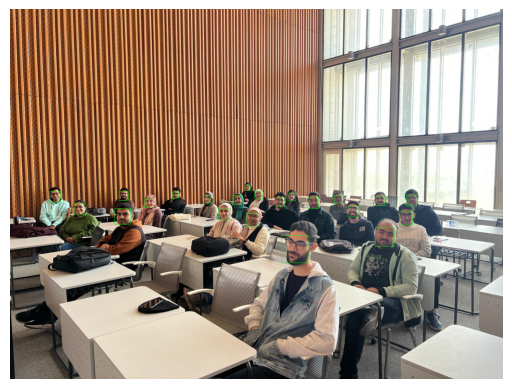

In [27]:
import face_recognition
import cv2
# Load the image
image_path = 'F:/semester 7/vision/Attendance/test.jpg'
image = face_recognition.load_image_file(image_path)

# Find face locations
face_locations = face_recognition.face_locations(image)

# Draw rectangles around faces
for face_location in face_locations:
    top, right, bottom, left = face_location
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)

# Display the image with face rectangles
plt.imshow(image)
plt.axis('off')
plt.show()